In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Afhanistan_2021

In [5]:
Afhanistan_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
17,17,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,68.68,...,-,-,-,-,-,-,-,-,0,0
20,20,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,20.00,...,24,0,-,-,6.00,-,0,0,1,0
97,97,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,67.85,...,123,2,1/36,61.50,6.47,57.0,0,0,4,0
107,107,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,73.60,...,-,-,-,-,-,-,-,-,2,0
126,126,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,82.02,...,44,0,-,-,4.88,-,0,0,0,0
193,193,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,57.37,...,141,2,1/45,70.50,4.70,90.0,0,0,1,0
204,204,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,95.00,...,129,7,3/46,18.42,4.30,25.7,0,0,0,0
213,213,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,64.44,...,-,-,-,-,-,-,-,-,0,0
216,216,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,150.00,...,155,8,4/42,19.37,5.92,19.6,1,0,0,0
255,255,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,110.42,...,-,-,-,-,-,-,-,-,2,2


In [6]:
Afhanistan_2021=Afhanistan_2021.reset_index()

In [7]:
Afhanistan_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,17,17,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,...,-,-,-,-,-,-,-,-,0,0
1,20,20,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,...,24,0,-,-,6.00,-,0,0,1,0
2,97,97,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,...,123,2,1/36,61.50,6.47,57.0,0,0,4,0
3,107,107,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,...,-,-,-,-,-,-,-,-,2,0
4,126,126,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,...,44,0,-,-,4.88,-,0,0,0,0
5,193,193,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,...,141,2,1/45,70.50,4.70,90.0,0,0,1,0
6,204,204,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,...,129,7,3/46,18.42,4.30,25.7,0,0,0,0
7,213,213,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,...,-,-,-,-,-,-,-,-,0,0
8,216,216,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,...,155,8,4/42,19.37,5.92,19.6,1,0,0,0
9,255,255,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,...,-,-,-,-,-,-,-,-,2,2


In [8]:
Afhanistan_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Afhanistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,68.68,0,...,-,-,-,-,-,-,-,-,0,0
1,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,20.00,0,...,24,0,-,-,6.00,-,0,0,1,0
2,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,67.85,0,...,123,2,1/36,61.50,6.47,57.0,0,0,4,0
3,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,73.60,0,...,-,-,-,-,-,-,-,-,2,0
4,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,82.02,0,...,44,0,-,-,4.88,-,0,0,0,0
5,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,57.37,0,...,141,2,1/45,70.50,4.70,90.0,0,0,1,0
6,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,95.00,0,...,129,7,3/46,18.42,4.30,25.7,0,0,0,0
7,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,64.44,0,...,-,-,-,-,-,-,-,-,0,0
8,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,150.00,0,...,155,8,4/42,19.37,5.92,19.6,1,0,0,0
9,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,110.42,1,...,-,-,-,-,-,-,-,-,2,2


In [10]:
Afhanistan_2021_players =Afhanistan_2021.copy()

In [11]:
Afhanistan_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Afhanistan_2021_players.HS=Afhanistan_2021_players.HS.str.extract('(\d+)')
Afhanistan_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Afhanistan_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,3,1,68,41,34.00,99,68.68,0,0,...,-,-,-,-,-,-,-,-,0,0
1,1,1,0,2,2,2.00,10,20.00,0,0,...,24,0,-,-,6.00,-,0,0,1,0
2,3,2,0,38,36,19.00,56,67.85,0,0,...,123,2,1/36,61.50,6.47,57.0,0,0,4,0
3,2,2,0,92,82,46.00,125,73.60,0,1,...,-,-,-,-,-,-,-,-,2,0
4,3,3,0,73,38,24.33,89,82.02,0,0,...,44,0,-,-,4.88,-,0,0,0,0
5,3,2,0,35,32,17.50,61,57.37,0,0,...,141,2,1/45,70.50,4.70,90.0,0,0,1,0
6,3,2,2,19,18,-,20,95.00,0,0,...,129,7,3/46,18.42,4.30,25.7,0,0,0,0
7,3,2,0,29,29,14.50,45,64.44,0,0,...,-,-,-,-,-,-,-,-,0,0
8,3,2,2,12,10,-,8,150.00,0,0,...,155,8,4/42,19.37,5.92,19.6,1,0,0,0
9,3,3,0,180,127,60.00,163,110.42,1,0,...,-,-,-,-,-,-,-,-,2,2


In [14]:
Afhanistan_2021_players.replace("-",0,inplace=True)

In [15]:
Afhanistan_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Afhanistan_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Afhanistan_2021_players),columns=Afhanistan_2021_players.columns)
Afhanistan_2021_players_scaled.shape
Afhanistan_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.420084,1.260252,0.654654,0.096454,-0.185786,0.340014,0.554630,-0.466142,-0.447214,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,-0.820553,-0.301511
1,-2.940588,-2.100420,-0.654654,-1.243751,-1.259217,-1.192982,-1.325830,-1.845654,-0.447214,-0.447214,...,-0.301511,-0.600848,-0.703989,-0.658547,1.097787,-0.657662,-0.447214,0.0,-0.063119,-0.301511
2,0.420084,-0.420084,-0.654654,-0.512730,-0.323406,-0.378578,-0.353907,-0.489663,-0.447214,-0.447214,...,-0.301511,0.944189,-0.054153,1.913874,1.274134,1.414382,-0.447214,0.0,2.209180,-0.301511
3,-1.260252,-0.420084,-0.654654,0.583801,0.942693,0.914887,1.103978,-0.326718,-0.447214,2.236068,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,0.694314,-0.301511
4,0.420084,1.260252,-0.654654,0.197985,-0.268358,-0.123239,0.343342,-0.088109,-0.447214,-0.447214,...,-0.301511,-0.288719,-0.703989,-0.658547,0.677558,-0.657662,-0.447214,0.0,-0.820553,-0.301511


In [17]:
Afhanistan_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,12.000000,1.200000e+01,12.000000,...,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,1.200000e+01,1.200000e+01,12.000000,12.0,1.200000e+01,1.200000e+01
mean,4.625929e-17,9.251859e-18,0.000000,1.850372e-17,-1.156482e-17,0.000000,1.734723e-18,0.000000,3.238150e-17,0.000000,...,-7.401487e-17,-1.850372e-17,9.251859e-17,0.000000,1.665335e-16,4.394633e-17,0.000000,0.0,1.850372e-17,-5.551115e-17
std,1.044466e+00,1.044466e+00,1.044466,1.044466e+00,1.044466e+00,1.044466,1.044466e+00,1.044466,1.044466e+00,1.044466,...,1.044466e+00,1.044466e+00,1.044466e+00,1.044466,1.044466e+00,1.044466e+00,1.044466,0.0,1.044466e+00,1.044466e+00
min,-2.940588e+00,-2.100420e+00,-0.654654,-1.243751e+00,-1.259217e+00,-1.288795,-1.368087e+00,-1.845654,-4.472136e-01,-0.447214,...,-3.015113e-01,-9.754023e-01,-7.039895e-01,-0.658547,-1.153443e+00,-6.576618e-01,-0.447214,0.0,-8.205527e-01,-3.015113e-01
25%,4.200840e-01,-4.200840e-01,-0.654654,-7.462506e-01,-5.917634e-01,-0.743862,-7.183778e-01,-0.513822,-4.472136e-01,-0.447214,...,-3.015113e-01,-9.754023e-01,-7.039895e-01,-0.658547,-1.153443e+00,-6.576618e-01,-0.447214,0.0,-8.205527e-01,-3.015113e-01
50%,4.200840e-01,-4.200840e-01,-0.654654,-2.081379e-01,-2.958817e-01,-0.250908,-1.531835e-01,-0.207413,-4.472136e-01,-0.447214,...,-3.015113e-01,-4.447834e-01,-7.039895e-01,-0.658547,5.199717e-01,-6.576618e-01,-0.447214,0.0,-4.418361e-01,-3.015113e-01
75%,4.200840e-01,1.260252e+00,0.654654,6.396434e-01,3.853343e-01,0.980758,6.919668e-01,0.388968,-4.472136e-01,-0.447214,...,-3.015113e-01,1.057336e+00,3.519947e-01,0.144446,7.751111e-01,2.520381e-01,-0.447214,0.0,6.943138e-01,-3.015113e-01
max,4.200840e-01,1.260252e+00,1.963961,2.370742e+00,2.181267e+00,1.585573,1.906870e+00,1.838333,2.236068e+00,2.236068,...,3.316625e+00,1.443595e+00,1.895356e+00,2.290326,1.274134e+00,2.613986e+00,2.236068,0.0,2.209180e+00,3.316625e+00


In [18]:
X =  Afhanistan_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 4.20084025e-01,  1.26025208e+00,  6.54653671e-01,
         9.64541569e-02, -1.85786169e-01,  3.40013742e-01,
         5.54629900e-01, -4.66142436e-01, -4.47213595e-01,
        -4.47213595e-01, -3.01511345e-01, -2.01660452e-02,
         9.47027448e-02, -1.74032861e+00,  4.20084025e-01,
        -1.08347268e+00, -9.55031526e-01, -3.01511345e-01,
        -9.75402280e-01, -7.03989469e-01, -6.58546776e-01,
        -1.15344284e+00, -6.57661807e-01, -4.47213595e-01,
         0.00000000e+00, -8.20552724e-01, -3.01511345e-01],
       [-2.94058818e+00, -2.10042013e+00, -6.54653671e-01,
        -1.24375097e+00, -1.25921737e+00, -1.19298235e+00,
        -1.32582957e+00, -1.84565389e+00, -4.47213595e-01,
        -4.47213595e-01, -3.01511345e-01, -1.23012876e+00,
        -7.57621958e-01, -1.70477139e+00, -2.94058818e+00,
        -3.61157559e-01, -6.43396494e-01, -3.01511345e-01,
        -6.00847805e-01, -7.03989469e-01, -6.58546776e-01,
         1.09778743e+00, -6.57661807e-01, -4.47213595e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Afhanistan_2021_players_scaled))

False

In [23]:
Afhanistan_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.420084,1.260252,0.654654,0.096454,-0.185786,0.340014,0.554630,-0.466142,-0.447214,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,-0.820553,-0.301511
1,-2.940588,-2.100420,-0.654654,-1.243751,-1.259217,-1.192982,-1.325830,-1.845654,-0.447214,-0.447214,...,-0.301511,-0.600848,-0.703989,-0.658547,1.097787,-0.657662,-0.447214,0.0,-0.063119,-0.301511
2,0.420084,-0.420084,-0.654654,-0.512730,-0.323406,-0.378578,-0.353907,-0.489663,-0.447214,-0.447214,...,-0.301511,0.944189,-0.054153,1.913874,1.274134,1.414382,-0.447214,0.0,2.209180,-0.301511
3,-1.260252,-0.420084,-0.654654,0.583801,0.942693,0.914887,1.103978,-0.326718,-0.447214,2.236068,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,0.694314,-0.301511
4,0.420084,1.260252,-0.654654,0.197985,-0.268358,-0.123239,0.343342,-0.088109,-0.447214,-0.447214,...,-0.301511,-0.288719,-0.703989,-0.658547,0.677558,-0.657662,-0.447214,0.0,-0.820553,-0.301511
5,0.420084,-0.420084,-0.654654,-0.573648,-0.433501,-0.450437,-0.248263,-0.786649,-0.447214,-0.447214,...,-0.301511,1.225105,-0.054153,2.290326,0.610021,2.613986,-0.447214,0.0,-0.063119,-0.301511
6,0.420084,-0.420084,1.963961,-0.898547,-0.818835,-1.288795,-1.114542,0.279723,-0.447214,-0.447214,...,-0.301511,1.037828,1.570438,0.111925,0.459939,0.276575,-0.447214,0.0,-0.820553,-0.301511
7,0.420084,-0.420084,-0.654654,-0.695485,-0.516073,-0.594156,-0.586323,-0.586297,-0.447214,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,-0.820553,-0.301511
8,0.420084,-0.420084,1.963961,-1.040690,-1.039026,-1.288795,-1.368087,1.838333,-0.447214,-0.447214,...,-0.301511,1.443595,1.895356,0.151661,1.067771,0.054830,2.236068,0.0,-0.820553,-0.301511
9,0.420084,1.260252,-0.654654,2.370742,2.181267,1.585573,1.906870,0.716701,2.236068,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,0.694314,3.316625


In [24]:
np.all(np.isfinite(Afhanistan_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


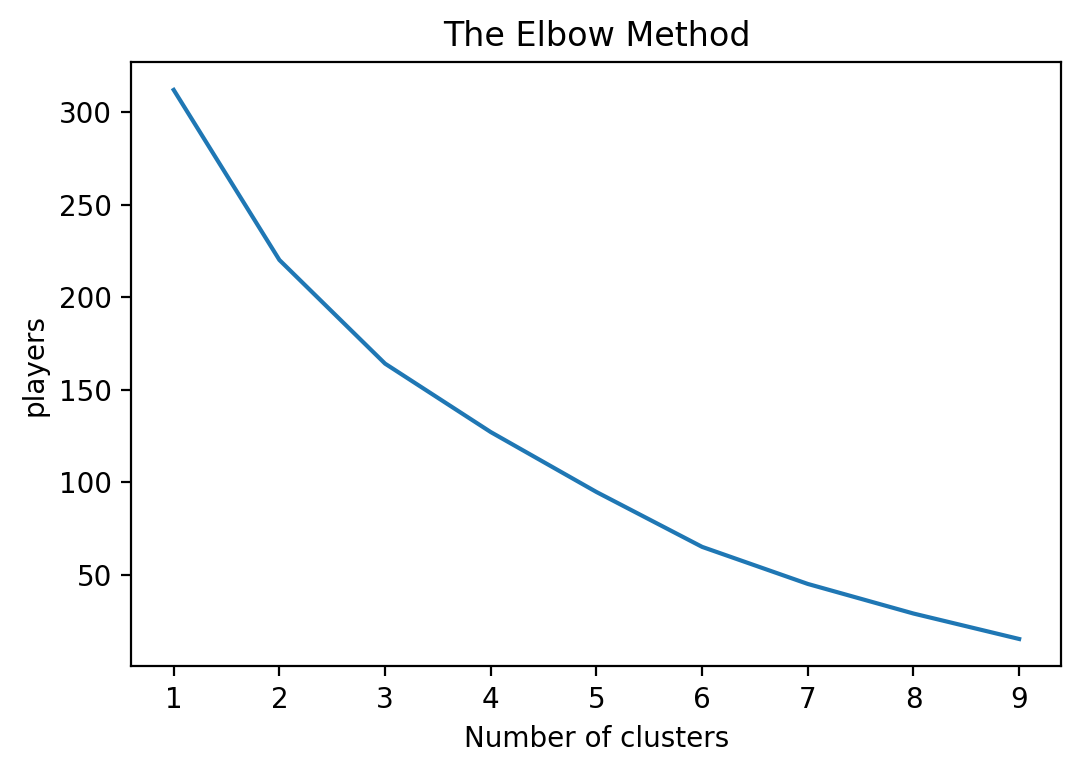

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1])

In [28]:
kmeans.cluster_centers_

array([[ 0.42008403,  1.26025208,  0.        ,  1.63972067,  1.85098072,
         1.44185468,  1.52655277,  0.35694528,  2.23606798, -0.4472136 ,
        -0.30151134,  1.79477802,  1.23113568,  1.08647076,  0.42008403,
        -1.08347268, -0.95503153, -0.30151134, -0.97540228, -0.70398947,
        -0.65854678, -1.15344284, -0.65766181, -0.4472136 ,  0.        ,
        -0.06311944,  1.50755672],
       [ 0.42008403, -0.42008403,  0.3927922 , -0.44368912, -0.48304404,
        -0.44564675, -0.62858055,  0.51980585, -0.4472136 ,  0.08944272,
        -0.30151134, -0.50415113, -0.18940549,  0.36228861,  0.42008403,
         1.08347268,  1.13448137,  0.42211588,  1.15331566,  0.98558526,
         0.92196549,  0.7983738 ,  0.92072653,  0.62609903,  0.        ,
         0.39134053, -0.30151134],
       [-0.58811764, -0.08401681, -0.3927922 , -0.21219915, -0.25734825,
        -0.13109512,  0.01795944, -0.66258396, -0.4472136 ,  0.08944272,
         0.42211588, -0.21376008, -0.30304878, -0.7968

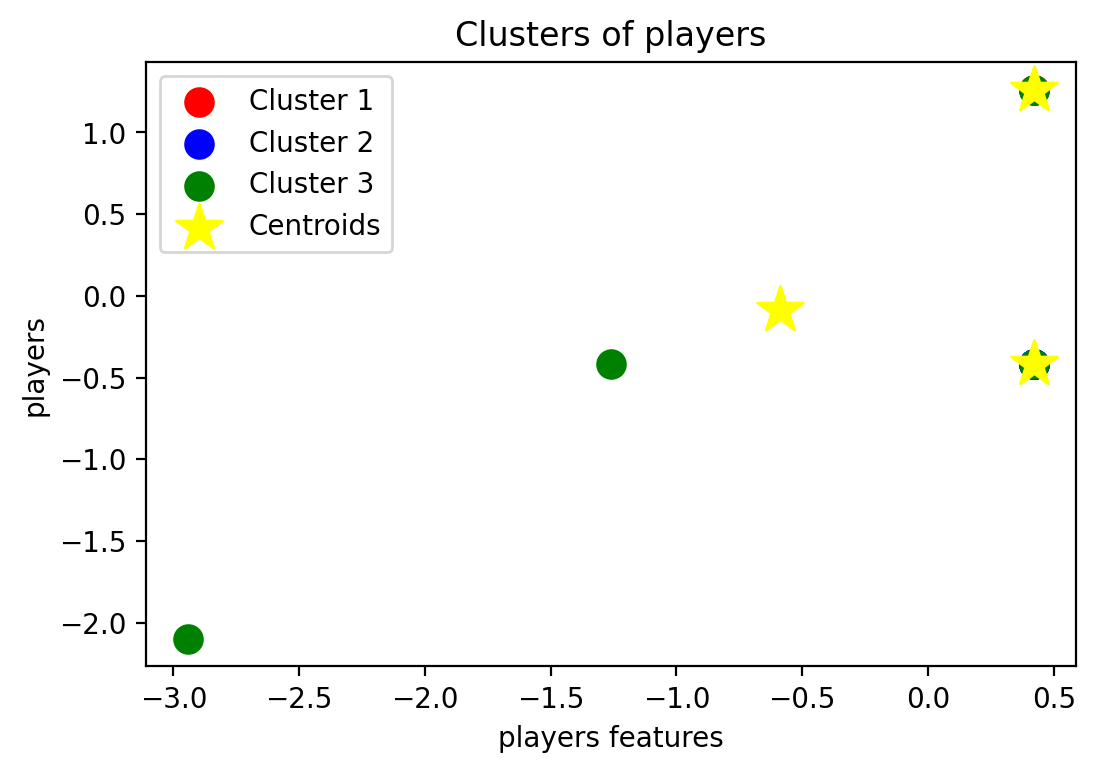

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Afhanistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,68.68,0,...,-,-,-,-,-,-,-,-,0,0
1,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,20.00,0,...,24,0,-,-,6.00,-,0,0,1,0
2,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,67.85,0,...,123,2,1/36,61.50,6.47,57.0,0,0,4,0
3,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,73.60,0,...,-,-,-,-,-,-,-,-,2,0
4,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,82.02,0,...,44,0,-,-,4.88,-,0,0,0,0
5,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,57.37,0,...,141,2,1/45,70.50,4.70,90.0,0,0,1,0
6,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,95.00,0,...,129,7,3/46,18.42,4.30,25.7,0,0,0,0
7,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,64.44,0,...,-,-,-,-,-,-,-,-,0,0
8,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,150.00,0,...,155,8,4/42,19.37,5.92,19.6,1,0,0,0
9,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,110.42,1,...,-,-,-,-,-,-,-,-,2,2


In [31]:
Afhanistan_2021["cluster"] = y_kmeans

In [32]:
Afhanistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,68.68,0,...,-,-,-,-,-,-,-,0,0,2
1,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,20.00,0,...,0,-,-,6.00,-,0,0,1,0,2
2,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,67.85,0,...,2,1/36,61.50,6.47,57.0,0,0,4,0,1
3,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,73.60,0,...,-,-,-,-,-,-,-,2,0,2
4,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,82.02,0,...,0,-,-,4.88,-,0,0,0,0,2
5,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,57.37,0,...,2,1/45,70.50,4.70,90.0,0,0,1,0,1
6,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,95.00,0,...,7,3/46,18.42,4.30,25.7,0,0,0,0,1
7,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,64.44,0,...,-,-,-,-,-,-,-,0,0,2
8,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,150.00,0,...,8,4/42,19.37,5.92,19.6,1,0,0,0,1
9,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,110.42,1,...,-,-,-,-,-,-,-,2,2,0


In [33]:
Afhanistan_2021['cluster'].value_counts()

1    5
2    5
0    2
Name: cluster, dtype: int64

In [34]:
Afhanistan_Cluster_2021 = np.array([2,5,5])

In [35]:
Afhanistan_Cluster_2021

array([2, 5, 5])

In [36]:
%store Afhanistan_Cluster_2021

Stored 'Afhanistan_Cluster_2021' (ndarray)


In [37]:
Afhanistan_2021_players_scaled.insert(0, 'Player', Afhanistan_2021.Player)

In [38]:
Afhanistan_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Asghar Afghan (AFG),0.420084,1.260252,0.654654,0.096454,-0.185786,0.340014,0.554630,-0.466142,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,-0.820553,-0.301511
1,Azmatullah Omarzai (AFG),-2.940588,-2.100420,-0.654654,-1.243751,-1.259217,-1.192982,-1.325830,-1.845654,-0.447214,...,-0.301511,-0.600848,-0.703989,-0.658547,1.097787,-0.657662,-0.447214,0.0,-0.063119,-0.301511
2,Gulbadin Naib (AFG),0.420084,-0.420084,-0.654654,-0.512730,-0.323406,-0.378578,-0.353907,-0.489663,-0.447214,...,-0.301511,0.944189,-0.054153,1.913874,1.274134,1.414382,-0.447214,0.0,2.209180,-0.301511
3,Hashmatullah Shahidi (AFG),-1.260252,-0.420084,-0.654654,0.583801,0.942693,0.914887,1.103978,-0.326718,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,0.694314,-0.301511
4,Javed Ahmadi (AFG),0.420084,1.260252,-0.654654,0.197985,-0.268358,-0.123239,0.343342,-0.088109,-0.447214,...,-0.301511,-0.288719,-0.703989,-0.658547,0.677558,-0.657662,-0.447214,0.0,-0.820553,-0.301511
5,Mohammad Nabi (AFG),0.420084,-0.420084,-0.654654,-0.573648,-0.433501,-0.450437,-0.248263,-0.786649,-0.447214,...,-0.301511,1.225105,-0.054153,2.290326,0.610021,2.613986,-0.447214,0.0,-0.063119,-0.301511
6,Mujeeb Ur Rahman (AFG),0.420084,-0.420084,1.963961,-0.898547,-0.818835,-1.288795,-1.114542,0.279723,-0.447214,...,-0.301511,1.037828,1.570438,0.111925,0.459939,0.276575,-0.447214,0.0,-0.820553,-0.301511
7,Najibullah Zadran (AFG),0.420084,-0.420084,-0.654654,-0.695485,-0.516073,-0.594156,-0.586323,-0.586297,-0.447214,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,-0.820553,-0.301511
8,Naveen-ul-Haq (AFG),0.420084,-0.420084,1.963961,-1.040690,-1.039026,-1.288795,-1.368087,1.838333,-0.447214,...,-0.301511,1.443595,1.895356,0.151661,1.067771,0.054830,2.236068,0.0,-0.820553,-0.301511
9,Rahmanullah Gurbaz (AFG),0.420084,1.260252,-0.654654,2.370742,2.181267,1.585573,1.906870,0.716701,2.236068,...,-0.301511,-0.975402,-0.703989,-0.658547,-1.153443,-0.657662,-0.447214,0.0,0.694314,3.316625


In [39]:
Afhanistan_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Asghar Afghan (AFG),0.340014,-0.658547
1,Azmatullah Omarzai (AFG),-1.192982,-0.658547
2,Gulbadin Naib (AFG),-0.378578,1.913874
3,Hashmatullah Shahidi (AFG),0.914887,-0.658547
4,Javed Ahmadi (AFG),-0.123239,-0.658547
5,Mohammad Nabi (AFG),-0.450437,2.290326
6,Mujeeb Ur Rahman (AFG),-1.288795,0.111925
7,Najibullah Zadran (AFG),-0.594156,-0.658547
8,Naveen-ul-Haq (AFG),-1.288795,0.151661
9,Rahmanullah Gurbaz (AFG),1.585573,-0.658547


In [40]:
Afhanistan_2021_Ave=Afhanistan_2021_players_scaled.mean()

In [41]:
Afhanistan_2021_Ave

Mat_x           4.625929e-17
Inns_x          9.251859e-18
NO              0.000000e+00
Runs_x          1.850372e-17
HS             -1.156482e-17
Ave_x           0.000000e+00
BF              1.734723e-18
SR_x            0.000000e+00
100             3.238150e-17
50              0.000000e+00
0              -3.700743e-17
4s              5.984796e-17
6s              7.401487e-17
Unnamed: 0_y   -9.251859e-17
Mat_y           4.625929e-17
Inns_y          0.000000e+00
Overs           5.551115e-17
Mdns           -7.401487e-17
Runs_y         -1.850372e-17
Wkts            9.251859e-17
Ave_y           0.000000e+00
Econ            1.665335e-16
SR_y            4.394633e-17
4               0.000000e+00
5               0.000000e+00
Ct              1.850372e-17
St             -5.551115e-17
dtype: float64

In [42]:
Afhanistan_Ave_2021 =Afhanistan_2021_Ave[['Ave_x','Ave_y']]

In [43]:
Afhanistan_Ave_2021

Ave_x    0.0
Ave_y    0.0
dtype: float64

In [44]:
Afhanistan_Ave_2021 = np.array([Afhanistan_Ave_2021.Ave_x, Afhanistan_Ave_2021.Ave_y])

In [45]:
Afhanistan_Ave_2021

array([0., 0.])

In [46]:
%store Afhanistan_Ave_2021

Stored 'Afhanistan_Ave_2021' (ndarray)


In [47]:
Afhanistan_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Asghar Afghan (AFG),3,3,1,68,41,34.00,99,68.68,0,...,-,-,-,-,-,-,-,0,0,2
1,Azmatullah Omarzai (AFG),1,1,0,2,2,2.00,10,20.00,0,...,0,-,-,6.00,-,0,0,1,0,2
2,Gulbadin Naib (AFG),3,2,0,38,36,19.00,56,67.85,0,...,2,1/36,61.50,6.47,57.0,0,0,4,0,1
3,Hashmatullah Shahidi (AFG),2,2,0,92,82,46.00,125,73.60,0,...,-,-,-,-,-,-,-,2,0,2
4,Javed Ahmadi (AFG),3,3,0,73,38,24.33,89,82.02,0,...,0,-,-,4.88,-,0,0,0,0,2
5,Mohammad Nabi (AFG),3,2,0,35,32,17.50,61,57.37,0,...,2,1/45,70.50,4.70,90.0,0,0,1,0,1
6,Mujeeb Ur Rahman (AFG),3,2,2,19,18*,-,20,95.00,0,...,7,3/46,18.42,4.30,25.7,0,0,0,0,1
7,Najibullah Zadran (AFG),3,2,0,29,29,14.50,45,64.44,0,...,-,-,-,-,-,-,-,0,0,2
8,Naveen-ul-Haq (AFG),3,2,2,12,10*,-,8,150.00,0,...,8,4/42,19.37,5.92,19.6,1,0,0,0,1
9,Rahmanullah Gurbaz (AFG),3,3,0,180,127,60.00,163,110.42,1,...,-,-,-,-,-,-,-,2,2,0
